# mlrose_hiive Tutorial Examples - Genevieve Hayes

## Overview

mlrose_hiive is a Python package for applying some of the most common randomized optimization and search algorithms to a range of different optimization problems, over both discrete- and continuous-valued parameter spaces. This notebook contains the examples used in the mlrose_hiive tutorial.

### Import Libraries

In [2]:
import mlrose_hiive
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

### Example 6: Fitting a Neural Network to the Iris Dataset

In [4]:
X = pd.read_pickle('X.pkl')
y = pd.read_pickle('y.pkl')

In [5]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 42)

In [14]:
type(X)

pandas.core.frame.DataFrame

In [6]:
# Normalize feature data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# One hot encode target values
one_hot = OneHotEncoder()

y_train_hot = one_hot.fit_transform(y_train.to_numpy().reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.to_numpy().reshape(-1, 1)).todense()

In [8]:
# Initialize neural network object and fit object - attempt 1
nn_model1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [2], activation ='relu', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3,curve=True)

nn_model1.fit(X_train_scaled, y_train_hot)

NeuralNetwork(clip_max=5, curve=True, early_stopping=True, hidden_nodes=[2],
              learning_rate=0.0001, max_attempts=100, max_iters=1000,
              random_state=3)

In [53]:
# Initialize neural network object and fit object - attempt 1
nn_model1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [4,2], activation ='relu', restarts=5,
                                 algorithm ='random_hill_climb', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3,curve=True)

nn_model1.fit(X_train_scaled, y_train_hot)

NeuralNetwork(clip_max=5, curve=True, early_stopping=True, hidden_nodes=[4, 2],
              learning_rate=0.0001, max_attempts=100, max_iters=1000,
              random_state=3, restarts=5)

0.7623215108245048


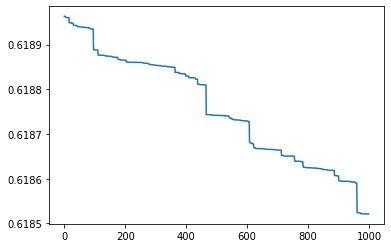

In [54]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)
plt.plot(nn_model1.fitness_curve)

In [50]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.45


In [23]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.7309198402948403


In [24]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.7365269461077845


In [10]:
# Initialize neural network object and fit object - attempt 2
nn_model2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [2], activation = 'relu', 
                                 algorithm = 'gradient_descent', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3,curve=True)

nn_model2.fit(X_train_scaled, y_train_hot)

NeuralNetwork(algorithm='gradient_descent', clip_max=5, curve=True,
              early_stopping=True, hidden_nodes=[2], learning_rate=0.0001,
              max_attempts=100, max_iters=1000, random_state=3)

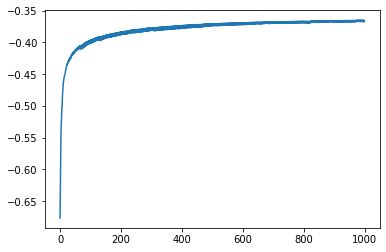

In [11]:
plt.plot(nn_model2.fitness_curve)

In [58]:
with open('nn_gd.npy', 'wb') as f:
    np.save(f, np.array(nn_model2.fitness_curve))

In [ ]:
nn_model

In [26]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model2.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.7581772113022113


In [27]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model2.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.7644710578842315


In [44]:
# Initialize neural network object and fit object - attempt 1
nn_model_sa = mlrose_hiive.NeuralNetwork(hidden_nodes = [4,2], activation ='relu', 
                                 algorithm ='simulated_annealing', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3,curve=True)

nn_model_sa.fit(X_train_scaled, y_train_hot)

NeuralNetwork(algorithm='simulated_annealing', clip_max=5, curve=True,
              early_stopping=True, hidden_nodes=[4, 2], learning_rate=0.0001,
              max_attempts=100, max_iters=1000, random_state=3)

In [45]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model_sa.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model_sa.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.7557202088452089
0.7624750499001997


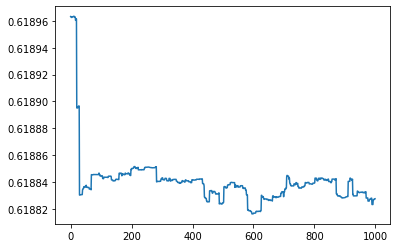

In [46]:
plt.plot(nn_model_sa.fitness_curve)

In [ ]:
learning rate, node layer, 

In [47]:
# Initialize neural network object and fit object - attempt 1
nn_model_sa = mlrose_hiive.NeuralNetwork(hidden_nodes = [4,2], activation ='relu', 
                                 algorithm ='simulated_annealing', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3,curve=True)

nn_model_sa.fit(X_train_scaled, y_train_hot)

NeuralNetwork(algorithm='simulated_annealing', clip_max=5, curve=True,
              early_stopping=True, hidden_nodes=[4, 2], learning_rate=0.001,
              max_attempts=100, max_iters=1000, random_state=3)

0.7557202088452089
0.7623215108245048


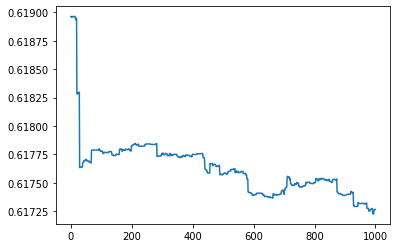

In [49]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model_sa.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model_sa.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)
plt.plot(nn_model_sa.fitness_curve)

In [ ]:
# Initialize neural network object and fit object - attempt 1
nn_model_sa = mlrose_hiive.NeuralNetwork(hidden_nodes = [4,2], activation ='relu', 
                                 algorithm ='simulated_annealing', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3,curve=True)

nn_model_sa.fit(X_train_scaled, y_train_hot)

In [50]:
# Initialize neural network object and fit object - attempt 1
nn_model_sa = mlrose_hiive.NeuralNetwork(hidden_nodes = [8,2], activation ='relu', 
                                 algorithm ='simulated_annealing', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3,curve=True)

nn_model_sa.fit(X_train_scaled, y_train_hot)

NeuralNetwork(algorithm='simulated_annealing', clip_max=5, curve=True,
              early_stopping=True, hidden_nodes=[8, 2], learning_rate=0.001,
              max_attempts=100, max_iters=1000, random_state=3)

0.5694103194103194
0.5651773376324275


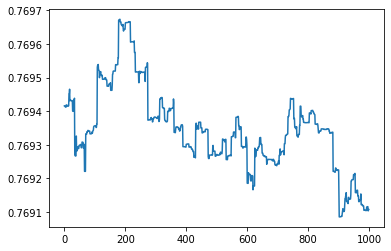

In [51]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model_sa.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model_sa.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)
plt.plot(nn_model_sa.fitness_curve)

In [55]:
# Initialize neural network object and fit object - attempt 1
import time
start = time.time()
nn_model_ga = mlrose_hiive.NeuralNetwork(hidden_nodes = [4,2], activation ='relu', 
                                 algorithm ='genetic_alg', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3,curve=True)

nn_model_ga.fit(X_train_scaled, y_train_hot)
print(time.time()-start)

2034.8083715438843


In [16]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model_ga.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model_ga.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.757985257985258
0.7640104406571473


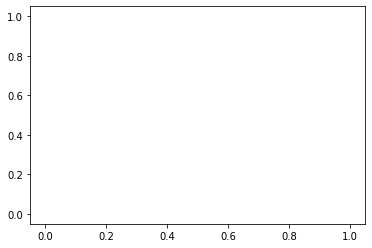

In [56]:
plt.plot(nn_model_ga.fitness_curve)

In [18]:
nn_model_ga.fitness_curve

[]

In [19]:
nn_model_sa.loss

0.676750184718447

In [ ]:
nn_model_sa.

### Example 7: Fitting a Logistic Regression to the Iris Data

In [55]:
# Initialize logistic regression object and fit object - attempt 1
lr_model1 = mlrose_hiive.LogisticRegression(algorithm = 'random_hill_climb', max_iters = 1000, 
                                      bias = True, learning_rate = 0.0001, 
                                      early_stopping = True, clip_max = 5, max_attempts = 100, 
                                      random_state = 3)

lr_model1.fit(X_train_scaled, y_train_hot)

In [56]:
# Predict labels for train set and assess accuracy
y_train_pred = lr_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.19166666666666668


In [57]:
# Predict labels for test set and assess accuracy
y_test_pred = lr_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.06666666666666667


In [58]:
# Initialize logistic regression object and fit object - attempt 2

lr_model2 = mlrose_hiive.LogisticRegression(algorithm = 'random_hill_climb', max_iters = 1000, 
                                      bias = True, learning_rate = 0.01, 
                                      early_stopping = True, clip_max = 5, max_attempts = 100,
                                      random_state = 3)

lr_model2.fit(X_train_scaled, y_train_hot)

In [59]:
# Predict labels for train set and assess accuracy
y_train_pred = lr_model2.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.6833333333333333


In [60]:
# Predict labels for test set and assess accuracy
y_test_pred = lr_model2.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.7


### Example 8: Fitting a Logistic Regression to the Iris Data using the NeuralNetwork() class

In [61]:
# Initialize neural network object and fit object - attempt 1
lr_nn_model1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [], activation = 'sigmoid', 
                                    algorithm = 'random_hill_climb', 
                                    max_iters = 1000, bias = True, is_classifier = True, 
                                    learning_rate = 0.0001, early_stopping = True, 
                                    clip_max = 5, max_attempts = 100, random_state = 3)

lr_nn_model1.fit(X_train_scaled, y_train_hot)

In [62]:
# Predict labels for train set and assess accuracy
y_train_pred = lr_nn_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.19166666666666668


In [63]:
# Predict labels for test set and assess accuracy
y_test_pred = lr_nn_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.06666666666666667


In [64]:
# Initialize neural network object and fit object - attempt 2
lr_nn_model2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [], activation = 'sigmoid', 
                                    algorithm = 'random_hill_climb', 
                                    max_iters = 1000, bias = True, is_classifier = True, 
                                    learning_rate = 0.01, early_stopping = True, 
                                    clip_max = 5, max_attempts = 100, random_state = 3)

lr_nn_model2.fit(X_train_scaled, y_train_hot)

In [65]:
# Predict labels for train set and assess accuracy
y_train_pred = lr_nn_model2.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.6833333333333333


In [66]:
# Predict labels for test set and assess accuracy
y_test_pred = lr_nn_model2.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.7


## queens grid search

In [59]:
OUTPUT_DIRECTORY = 'output'
SEED = 1

### rhc

In [98]:
from mlrose_hiive.runners import RHCRunner

experiment_name = 'example_experiment'

rhc = RHCRunner(problem=problem_cust,
                experiment_name=experiment_name,
                output_directory=OUTPUT_DIRECTORY,
                seed=SEED,
                iteration_list=2 ** np.arange(10),
                max_attempts=1000,
                restart_list=[25, 75, 100])

df_run_stats, df_run_curves = rhc.run()  

Running rhc
*****************
*** Run START ***
*****************
restarts:[25], max_iters:[512], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[23.0000]
	[5 3 4 0 7 1 3 5]...

restarts:[25], max_iters:[512], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[1], done:[False], time:[0.00], fitness:[23.0000]
	[5 3 4 0 7 1 3 5]...

restarts:[25], max_iters:[512], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[3], iteration:[2], done:[False], time:[0.02], fitness:[23.0000]
	[5 3 4 0 7 1 3 5]...

restarts:[25], max_iters:[512], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[5], iteration:[4], done:[False], time:[0.04], fitness:[23.0000]
	[5 3 4 0 7 1 3 5]...

restarts:[25], max_iters:[512], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attem

restarts:[25], max_iters:[512], current_restart:[3]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[201], iteration:[256], done:[False], time:[1.26], fitness:[27.0000]
	[3 6 0 3 5 7 2 4]...

restarts:[25], max_iters:[512], current_restart:[3]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[457], iteration:[512], done:[True], time:[1.38], fitness:[27.0000]
	[3 6 0 3 5 7 2 4]...

restarts:[25], max_iters:[512], current_restart:[4]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.40], fitness:[22.0000]
	[7 7 0 5 1 1 6 7]...

restarts:[25], max_iters:[512], current_restart:[4]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[1], done:[False], time:[1.41], fitness:[22.0000]
	[7 7 0 5 1 1 6 7]...

restarts:[25], max_iters:[512], current_restart:[4]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[3], iteration:[2], done:[False], time:[1.43], fitness:[

restarts:[25], max_iters:[512], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[7], iteration:[16], done:[False], time:[3.56], fitness:[24.0000]
	[5 3 4 0 5 0 2 7]...

restarts:[25], max_iters:[512], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[32], done:[False], time:[3.64], fitness:[25.0000]
	[1 3 4 0 5 0 2 7]...

restarts:[25], max_iters:[512], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[34], iteration:[64], done:[False], time:[3.70], fitness:[25.0000]
	[1 3 4 0 5 0 2 7]...

restarts:[25], max_iters:[512], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[28], iteration:[128], done:[False], time:[3.79], fitness:[26.0000]
	[1 6 4 0 5 0 2 7]...

restarts:[25], max_iters:[512], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[156], iteration:[256], done:[False], time:[3.91], fitne

restarts:[25], max_iters:[512], current_restart:[11]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[4], done:[False], time:[7.14], fitness:[23.0000]
	[1 4 7 2 6 3 7 7]...

restarts:[25], max_iters:[512], current_restart:[11]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[8], done:[False], time:[7.23], fitness:[26.0000]
	[1 5 7 2 6 3 1 7]...

restarts:[25], max_iters:[512], current_restart:[11]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[9], iteration:[16], done:[False], time:[7.33], fitness:[26.0000]
	[1 5 7 2 6 3 1 7]...

restarts:[25], max_iters:[512], current_restart:[11]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[32], done:[False], time:[7.41], fitness:[28.0000]
	[0 5 7 2 6 3 1 4]...

restarts:[25], max_iters:[512], current_restart:[11]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[34], iteration:[64], done:[False], time:[7.50], fitness

restarts:[25], max_iters:[512], current_restart:[14]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[494], iteration:[512], done:[True], time:[11.56], fitness:[26.0000]
	[7 0 6 4 2 5 3 1]...

restarts:[25], max_iters:[512], current_restart:[15]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[11.65], fitness:[23.0000]
	[7 0 5 1 2 5 6 1]...

restarts:[25], max_iters:[512], current_restart:[15]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[1], done:[False], time:[11.65], fitness:[23.0000]
	[7 0 5 1 2 5 6 1]...

restarts:[25], max_iters:[512], current_restart:[15]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[3], iteration:[2], done:[False], time:[11.92], fitness:[23.0000]
	[7 0 5 1 2 5 6 1]...

restarts:[25], max_iters:[512], current_restart:[15]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[4], done:[False], time:[12.07], fit

restarts:[25], max_iters:[512], current_restart:[18]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[64], done:[False], time:[17.33], fitness:[27.0000]
	[7 0 2 4 6 1 3 5]...

restarts:[25], max_iters:[512], current_restart:[18]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[66], iteration:[128], done:[False], time:[17.53], fitness:[27.0000]
	[7 0 2 4 6 1 3 5]...

restarts:[25], max_iters:[512], current_restart:[18]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[194], iteration:[256], done:[False], time:[17.74], fitness:[27.0000]
	[7 0 2 4 6 1 3 5]...

restarts:[25], max_iters:[512], current_restart:[18]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[450], iteration:[512], done:[True], time:[18.15], fitness:[27.0000]
	[7 0 2 4 6 1 3 5]...

restarts:[25], max_iters:[512], current_restart:[19]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[18.

restarts:[25], max_iters:[512], current_restart:[22]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[10], iteration:[16], done:[False], time:[23.17], fitness:[24.0000]
	[1 7 1 2 0 5 6 0]...

restarts:[25], max_iters:[512], current_restart:[22]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[26], iteration:[32], done:[False], time:[23.28], fitness:[24.0000]
	[1 7 1 2 0 5 6 0]...

restarts:[25], max_iters:[512], current_restart:[22]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[58], iteration:[64], done:[False], time:[23.42], fitness:[24.0000]
	[1 7 1 2 0 5 6 0]...

restarts:[25], max_iters:[512], current_restart:[22]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[25], iteration:[128], done:[False], time:[23.57], fitness:[27.0000]
	[1 7 4 2 0 5 3 0]...

restarts:[25], max_iters:[512], current_restart:[22]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[153], iteration:[256], done:[False], time:[2

restarts:[75], max_iters:[512], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[3], iteration:[2], done:[False], time:[0.13], fitness:[23.0000]
	[5 3 4 0 7 1 3 5]...

restarts:[75], max_iters:[512], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[5], iteration:[4], done:[False], time:[0.25], fitness:[23.0000]
	[5 3 4 0 7 1 3 5]...

restarts:[75], max_iters:[512], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[4], iteration:[8], done:[False], time:[0.38], fitness:[24.0000]
	[5 2 4 0 7 1 3 5]...

restarts:[75], max_iters:[512], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[12], iteration:[16], done:[False], time:[0.55], fitness:[24.0000]
	[5 2 4 0 7 1 3 5]...

restarts:[75], max_iters:[512], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[28], iteration:[32], done:[False], time:[0.68], fitness:[24.

restarts:[75], max_iters:[512], current_restart:[3]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[201], iteration:[256], done:[False], time:[6.33], fitness:[27.0000]
	[3 6 0 3 5 7 2 4]...

restarts:[75], max_iters:[512], current_restart:[3]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[457], iteration:[512], done:[True], time:[6.59], fitness:[27.0000]
	[3 6 0 3 5 7 2 4]...

restarts:[75], max_iters:[512], current_restart:[4]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[6.79], fitness:[22.0000]
	[7 7 0 5 1 1 6 7]...

restarts:[75], max_iters:[512], current_restart:[4]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[1], done:[False], time:[6.79], fitness:[22.0000]
	[7 7 0 5 1 1 6 7]...

restarts:[75], max_iters:[512], current_restart:[4]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[3], iteration:[2], done:[False], time:[7.01], fitness:[

restarts:[75], max_iters:[512], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[7], iteration:[16], done:[False], time:[13.19], fitness:[24.0000]
	[5 3 4 0 5 0 2 7]...

restarts:[75], max_iters:[512], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[32], done:[False], time:[13.41], fitness:[25.0000]
	[1 3 4 0 5 0 2 7]...

restarts:[75], max_iters:[512], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[34], iteration:[64], done:[False], time:[13.67], fitness:[25.0000]
	[1 3 4 0 5 0 2 7]...

restarts:[75], max_iters:[512], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[28], iteration:[128], done:[False], time:[13.89], fitness:[26.0000]
	[1 6 4 0 5 0 2 7]...

restarts:[75], max_iters:[512], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[156], iteration:[256], done:[False], time:[14.17], 

restarts:[75], max_iters:[512], current_restart:[11]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[3], iteration:[2], done:[False], time:[22.83], fitness:[19.0000]
	[7 4 7 2 5 3 7 7]...

restarts:[75], max_iters:[512], current_restart:[11]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[4], done:[False], time:[23.21], fitness:[23.0000]
	[1 4 7 2 6 3 7 7]...

restarts:[75], max_iters:[512], current_restart:[11]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[8], done:[False], time:[23.47], fitness:[26.0000]
	[1 5 7 2 6 3 1 7]...

restarts:[75], max_iters:[512], current_restart:[11]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[9], iteration:[16], done:[False], time:[23.79], fitness:[26.0000]
	[1 5 7 2 6 3 1 7]...

restarts:[75], max_iters:[512], current_restart:[11]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[32], done:[False], time:[24.09], fitn

restarts:[75], max_iters:[512], current_restart:[14]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[238], iteration:[256], done:[False], time:[37.15], fitness:[26.0000]
	[7 0 6 4 2 5 3 1]...

restarts:[75], max_iters:[512], current_restart:[14]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[494], iteration:[512], done:[True], time:[37.70], fitness:[26.0000]
	[7 0 6 4 2 5 3 1]...

restarts:[75], max_iters:[512], current_restart:[15]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[38.06], fitness:[23.0000]
	[7 0 5 1 2 5 6 1]...

restarts:[75], max_iters:[512], current_restart:[15]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[1], done:[False], time:[38.07], fitness:[23.0000]
	[7 0 5 1 2 5 6 1]...

restarts:[75], max_iters:[512], current_restart:[15]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[3], iteration:[2], done:[False], time:[38.38],

restarts:[75], max_iters:[512], current_restart:[18]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[16], iteration:[16], done:[False], time:[51.10], fitness:[24.0000]
	[7 0 5 3 6 1 3 5]...

restarts:[75], max_iters:[512], current_restart:[18]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[32], iteration:[32], done:[False], time:[51.43], fitness:[24.0000]
	[7 0 5 3 6 1 3 5]...

restarts:[75], max_iters:[512], current_restart:[18]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[64], done:[False], time:[51.89], fitness:[27.0000]
	[7 0 2 4 6 1 3 5]...

restarts:[75], max_iters:[512], current_restart:[18]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[66], iteration:[128], done:[False], time:[52.30], fitness:[27.0000]
	[7 0 2 4 6 1 3 5]...

restarts:[75], max_iters:[512], current_restart:[18]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[194], iteration:[256], done:[False], time:[52

restarts:[75], max_iters:[512], current_restart:[22]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[2], done:[False], time:[71.07], fitness:[22.0000]
	[1 7 1 2 4 5 6 0]...

restarts:[75], max_iters:[512], current_restart:[22]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[3], iteration:[4], done:[False], time:[71.47], fitness:[22.0000]
	[1 7 1 2 4 5 6 0]...

restarts:[75], max_iters:[512], current_restart:[22]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[8], done:[False], time:[71.94], fitness:[24.0000]
	[1 7 1 2 0 5 6 0]...

restarts:[75], max_iters:[512], current_restart:[22]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[10], iteration:[16], done:[False], time:[72.37], fitness:[24.0000]
	[1 7 1 2 0 5 6 0]...

restarts:[75], max_iters:[512], current_restart:[22]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[26], iteration:[32], done:[False], time:[72.81], fi

restarts:[75], max_iters:[512], current_restart:[25]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[244], iteration:[256], done:[False], time:[99.69], fitness:[25.0000]
	[4 0 4 6 7 3 1 5]...

restarts:[75], max_iters:[512], current_restart:[25]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[500], iteration:[512], done:[True], time:[101.29], fitness:[25.0000]
	[4 0 4 6 7 3 1 5]...

restarts:[75], max_iters:[512], current_restart:[26]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[102.07], fitness:[11.0000]
	[2 3 4 5 6 2 2 3]...

restarts:[75], max_iters:[512], current_restart:[26]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[1], done:[False], time:[102.08], fitness:[15.0000]
	[6 3 4 5 6 2 2 3]...

restarts:[75], max_iters:[512], current_restart:[26]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[2], done:[False], time:[102.

restarts:[75], max_iters:[512], current_restart:[29]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[12], iteration:[16], done:[False], time:[134.58], fitness:[22.0000]
	[3 6 4 0 7 3 5 3]...

restarts:[75], max_iters:[512], current_restart:[29]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[4], iteration:[32], done:[False], time:[135.44], fitness:[26.0000]
	[1 6 4 0 1 3 5 2]...

restarts:[75], max_iters:[512], current_restart:[29]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[27], iteration:[64], done:[False], time:[136.59], fitness:[27.0000]
	[1 6 4 0 0 3 5 2]...

restarts:[75], max_iters:[512], current_restart:[29]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[91], iteration:[128], done:[False], time:[139.30], fitness:[27.0000]
	[1 6 4 0 0 3 5 2]...

restarts:[75], max_iters:[512], current_restart:[29]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[219], iteration:[256], done:[False], time

restarts:[75], max_iters:[512], current_restart:[33]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[3], iteration:[2], done:[False], time:[176.12], fitness:[22.0000]
	[5 7 6 0 1 6 6 3]...

restarts:[75], max_iters:[512], current_restart:[33]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[4], done:[False], time:[177.04], fitness:[24.0000]
	[5 7 2 0 1 6 6 3]...

restarts:[75], max_iters:[512], current_restart:[33]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[8], done:[False], time:[177.92], fitness:[25.0000]
	[5 7 2 0 1 4 6 3]...

restarts:[75], max_iters:[512], current_restart:[33]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[9], iteration:[16], done:[False], time:[178.89], fitness:[25.0000]
	[5 7 2 0 1 4 6 3]...

restarts:[75], max_iters:[512], current_restart:[33]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[25], iteration:[32], done:[False], time:[179.73]

restarts:[75], max_iters:[512], current_restart:[36]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[94], iteration:[256], done:[False], time:[209.85], fitness:[27.0000]
	[6 1 7 4 0 3 5 2]...

restarts:[75], max_iters:[512], current_restart:[36]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[350], iteration:[512], done:[True], time:[211.10], fitness:[27.0000]
	[6 1 7 4 0 3 5 2]...

restarts:[75], max_iters:[512], current_restart:[37]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[211.64], fitness:[18.0000]
	[4 1 5 1 4 2 6 7]...

restarts:[75], max_iters:[512], current_restart:[37]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[1], done:[False], time:[211.65], fitness:[19.0000]
	[3 1 5 1 4 2 6 7]...

restarts:[75], max_iters:[512], current_restart:[37]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[2], done:[False], time:[212.

restarts:[75], max_iters:[512], current_restart:[40]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[16], done:[False], time:[233.49], fitness:[26.0000]
	[0 2 5 7 1 1 3 6]...

restarts:[75], max_iters:[512], current_restart:[40]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[18], iteration:[32], done:[False], time:[233.97], fitness:[26.0000]
	[0 2 5 7 1 1 3 6]...

restarts:[75], max_iters:[512], current_restart:[40]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[50], iteration:[64], done:[False], time:[234.54], fitness:[26.0000]
	[0 2 5 7 1 1 3 6]...

restarts:[75], max_iters:[512], current_restart:[40]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[49], iteration:[128], done:[False], time:[235.18], fitness:[27.0000]
	[0 2 5 7 4 1 3 6]...

restarts:[75], max_iters:[512], current_restart:[40]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[177], iteration:[256], done:[False], time

restarts:[75], max_iters:[512], current_restart:[44]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[3], iteration:[2], done:[False], time:[256.59], fitness:[24.0000]
	[5 3 0 4 0 5 2 6]...

restarts:[75], max_iters:[512], current_restart:[44]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[5], iteration:[4], done:[False], time:[257.03], fitness:[24.0000]
	[5 3 0 4 0 5 2 6]...

restarts:[75], max_iters:[512], current_restart:[44]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[9], iteration:[8], done:[False], time:[257.48], fitness:[24.0000]
	[5 3 0 4 0 5 2 6]...

restarts:[75], max_iters:[512], current_restart:[44]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[6], iteration:[16], done:[False], time:[257.97], fitness:[27.0000]
	[5 3 0 4 7 5 2 6]...

restarts:[75], max_iters:[512], current_restart:[44]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[22], iteration:[32], done:[False], time:[258.47]

restarts:[75], max_iters:[512], current_restart:[47]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[179], iteration:[256], done:[False], time:[280.60], fitness:[27.0000]
	[5 1 6 1 3 7 0 2]...

restarts:[75], max_iters:[512], current_restart:[47]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[435], iteration:[512], done:[True], time:[281.81], fitness:[27.0000]
	[5 1 6 1 3 7 0 2]...

restarts:[75], max_iters:[512], current_restart:[48]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[282.30], fitness:[20.0000]
	[5 3 5 5 2 7 4 1]...

restarts:[75], max_iters:[512], current_restart:[48]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[1], done:[False], time:[282.30], fitness:[20.0000]
	[5 3 5 5 2 7 4 1]...

restarts:[75], max_iters:[512], current_restart:[48]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[3], iteration:[2], done:[False], time:[283

restarts:[75], max_iters:[512], current_restart:[51]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[12], iteration:[16], done:[False], time:[305.65], fitness:[24.0000]
	[6 2 0 7 4 2 0 6]...

restarts:[75], max_iters:[512], current_restart:[51]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[7], iteration:[32], done:[False], time:[306.65], fitness:[25.0000]
	[3 2 0 7 4 2 0 6]...

restarts:[75], max_iters:[512], current_restart:[51]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[39], iteration:[64], done:[False], time:[307.26], fitness:[25.0000]
	[3 2 0 7 4 2 0 6]...

restarts:[75], max_iters:[512], current_restart:[51]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[44], iteration:[128], done:[False], time:[307.96], fitness:[27.0000]
	[5 3 0 7 4 2 0 6]...

restarts:[75], max_iters:[512], current_restart:[51]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[172], iteration:[256], done:[False], time

restarts:[75], max_iters:[512], current_restart:[55]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[2], done:[False], time:[333.51], fitness:[22.0000]
	[5 3 0 6 2 0 5 6]...

restarts:[75], max_iters:[512], current_restart:[55]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[3], iteration:[4], done:[False], time:[334.31], fitness:[22.0000]
	[5 3 0 6 2 0 5 6]...

restarts:[75], max_iters:[512], current_restart:[55]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[7], iteration:[8], done:[False], time:[335.08], fitness:[22.0000]
	[5 3 0 6 2 0 5 6]...

restarts:[75], max_iters:[512], current_restart:[55]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[3], iteration:[16], done:[False], time:[335.65], fitness:[24.0000]
	[7 3 0 6 2 0 5 6]...

restarts:[75], max_iters:[512], current_restart:[55]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[13], iteration:[32], done:[False], time:[336.32]

restarts:[75], max_iters:[512], current_restart:[58]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[227], iteration:[256], done:[False], time:[366.08], fitness:[27.0000]
	[5 2 1 6 4 7 0 3]...

restarts:[75], max_iters:[512], current_restart:[58]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[483], iteration:[512], done:[True], time:[368.60], fitness:[27.0000]
	[5 2 1 6 4 7 0 3]...

restarts:[75], max_iters:[512], current_restart:[59]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[369.69], fitness:[19.0000]
	[6 1 4 0 6 1 2 4]...

restarts:[75], max_iters:[512], current_restart:[59]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[1], done:[False], time:[369.69], fitness:[20.0000]
	[6 1 4 0 6 6 2 4]...

restarts:[75], max_iters:[512], current_restart:[59]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[2], done:[False], time:[370

restarts:[75], max_iters:[512], current_restart:[62]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[13], iteration:[16], done:[False], time:[399.40], fitness:[24.0000]
	[5 4 4 1 3 2 6 2]...

restarts:[75], max_iters:[512], current_restart:[62]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[15], iteration:[32], done:[False], time:[400.23], fitness:[25.0000]
	[5 0 4 1 3 2 6 2]...

restarts:[75], max_iters:[512], current_restart:[62]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[17], iteration:[64], done:[False], time:[401.48], fitness:[27.0000]
	[5 7 4 1 3 6 6 2]...

restarts:[75], max_iters:[512], current_restart:[62]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[81], iteration:[128], done:[False], time:[402.77], fitness:[27.0000]
	[5 7 4 1 3 6 6 2]...

restarts:[75], max_iters:[512], current_restart:[62]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[209], iteration:[256], done:[False], tim

restarts:[75], max_iters:[512], current_restart:[66]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[3], iteration:[2], done:[False], time:[438.33], fitness:[25.0000]
	[6 0 3 7 5 5 2 4]...

restarts:[75], max_iters:[512], current_restart:[66]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[5], iteration:[4], done:[False], time:[439.06], fitness:[25.0000]
	[6 0 3 7 5 5 2 4]...

restarts:[75], max_iters:[512], current_restart:[66]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[9], iteration:[8], done:[False], time:[440.19], fitness:[25.0000]
	[6 0 3 7 5 5 2 4]...

restarts:[75], max_iters:[512], current_restart:[66]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[16], done:[False], time:[441.10], fitness:[26.0000]
	[6 0 3 7 5 7 2 4]...

restarts:[75], max_iters:[512], current_restart:[66]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[18], iteration:[32], done:[False], time:[441.99]

restarts:[75], max_iters:[512], current_restart:[69]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[221], iteration:[256], done:[False], time:[477.05], fitness:[27.0000]
	[5 2 6 1 7 4 3 0]...

restarts:[75], max_iters:[512], current_restart:[69]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[477], iteration:[512], done:[True], time:[479.04], fitness:[27.0000]
	[5 2 6 1 7 4 3 0]...

restarts:[75], max_iters:[512], current_restart:[70]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[479.78], fitness:[23.0000]
	[5 2 7 0 7 3 6 4]...

restarts:[75], max_iters:[512], current_restart:[70]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[1], done:[False], time:[479.78], fitness:[23.0000]
	[5 2 7 0 7 3 6 4]...

restarts:[75], max_iters:[512], current_restart:[70]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[3], iteration:[2], done:[False], time:[480

restarts:[75], max_iters:[512], current_restart:[73]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[6], iteration:[16], done:[False], time:[511.23], fitness:[25.0000]
	[7 7 0 6 6 1 5 2]...

restarts:[75], max_iters:[512], current_restart:[73]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[22], iteration:[32], done:[False], time:[512.54], fitness:[25.0000]
	[7 7 0 6 6 1 5 2]...

restarts:[75], max_iters:[512], current_restart:[73]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[18], iteration:[64], done:[False], time:[513.94], fitness:[27.0000]
	[5 7 0 4 6 1 5 2]...

restarts:[75], max_iters:[512], current_restart:[73]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[82], iteration:[128], done:[False], time:[515.40], fitness:[27.0000]
	[5 7 0 4 6 1 5 2]...

restarts:[75], max_iters:[512], current_restart:[73]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[116], iteration:[256], done:[False], time

restarts:[100], max_iters:[512], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[9.38], fitness:[20.0000]
	[4 6 1 0 1 4 1 3]...

restarts:[100], max_iters:[512], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[1], done:[False], time:[9.38], fitness:[22.0000]
	[4 6 1 0 1 4 0 3]...

restarts:[100], max_iters:[512], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[2], done:[False], time:[10.88], fitness:[22.0000]
	[4 6 1 0 1 4 0 3]...

restarts:[100], max_iters:[512], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[4], iteration:[4], done:[False], time:[12.17], fitness:[22.0000]
	[4 6 1 0 1 4 0 3]...

restarts:[100], max_iters:[512], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[8], done:[False], time:[13.12], fitness:

restarts:[100], max_iters:[512], current_restart:[4]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[61], iteration:[64], done:[False], time:[42.05], fitness:[26.0000]
	[3 7 0 5 1 1 6 2]...

restarts:[100], max_iters:[512], current_restart:[4]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[125], iteration:[128], done:[False], time:[42.86], fitness:[26.0000]
	[3 7 0 5 1 1 6 2]...

restarts:[100], max_iters:[512], current_restart:[4]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[83], iteration:[256], done:[False], time:[44.00], fitness:[27.0000]
	[3 7 0 4 1 1 6 2]...

restarts:[100], max_iters:[512], current_restart:[4]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[339], iteration:[512], done:[True], time:[45.08], fitness:[27.0000]
	[3 7 0 4 1 1 6 2]...

restarts:[100], max_iters:[512], current_restart:[5]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[46

restarts:[100], max_iters:[512], current_restart:[8]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[4], iteration:[4], done:[False], time:[76.49], fitness:[21.0000]
	[4 3 5 7 6 3 7 4]...

restarts:[100], max_iters:[512], current_restart:[8]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[8], done:[False], time:[77.20], fitness:[22.0000]
	[4 6 5 7 6 3 7 4]...

restarts:[100], max_iters:[512], current_restart:[8]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[3], iteration:[16], done:[False], time:[77.94], fitness:[25.0000]
	[6 1 5 7 1 3 7 4]...

restarts:[100], max_iters:[512], current_restart:[8]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[10], iteration:[32], done:[False], time:[78.76], fitness:[26.0000]
	[6 0 5 7 1 3 7 4]...

restarts:[100], max_iters:[512], current_restart:[8]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[31], iteration:[64], done:[False], time:[79.59], f

restarts:[100], max_iters:[512], current_restart:[11]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[482], iteration:[512], done:[True], time:[108.74], fitness:[28.0000]
	[0 5 7 2 6 3 1 4]...

restarts:[100], max_iters:[512], current_restart:[12]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[109.64], fitness:[17.0000]
	[2 4 3 2 5 2 3 5]...

restarts:[100], max_iters:[512], current_restart:[12]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[1], done:[False], time:[109.65], fitness:[17.0000]
	[2 4 3 2 5 2 3 5]...

restarts:[100], max_iters:[512], current_restart:[12]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[2], done:[False], time:[110.56], fitness:[20.0000]
	[2 4 3 2 5 2 0 5]...

restarts:[100], max_iters:[512], current_restart:[12]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[4], done:[False], time:[11

restarts:[100], max_iters:[512], current_restart:[15]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[11], iteration:[16], done:[False], time:[138.14], fitness:[26.0000]
	[7 0 3 0 2 5 6 1]...

restarts:[100], max_iters:[512], current_restart:[15]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[27], iteration:[32], done:[False], time:[138.92], fitness:[26.0000]
	[7 0 3 0 2 5 6 1]...

restarts:[100], max_iters:[512], current_restart:[15]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[59], iteration:[64], done:[False], time:[139.69], fitness:[26.0000]
	[7 0 3 0 2 5 6 1]...

restarts:[100], max_iters:[512], current_restart:[15]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[123], iteration:[128], done:[False], time:[140.49], fitness:[26.0000]
	[7 0 3 0 2 5 6 1]...

restarts:[100], max_iters:[512], current_restart:[15]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[251], iteration:[256], done:[False

restarts:[100], max_iters:[512], current_restart:[19]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[173.49], fitness:[21.0000]
	[1 3 0 3 1 7 0 3]...

restarts:[100], max_iters:[512], current_restart:[19]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[1], done:[False], time:[173.50], fitness:[21.0000]
	[1 3 0 3 1 7 0 3]...

restarts:[100], max_iters:[512], current_restart:[19]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[3], iteration:[2], done:[False], time:[174.36], fitness:[21.0000]
	[1 3 0 3 1 7 0 3]...

restarts:[100], max_iters:[512], current_restart:[19]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[4], done:[False], time:[175.39], fitness:[24.0000]
	[1 3 0 6 1 7 0 3]...

restarts:[100], max_iters:[512], current_restart:[19]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[5], iteration:[8], done:[False], time:[176.4

restarts:[100], max_iters:[512], current_restart:[22]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[26], iteration:[32], done:[False], time:[213.86], fitness:[24.0000]
	[1 7 1 2 0 5 6 0]...

restarts:[100], max_iters:[512], current_restart:[22]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[58], iteration:[64], done:[False], time:[214.75], fitness:[24.0000]
	[1 7 1 2 0 5 6 0]...

restarts:[100], max_iters:[512], current_restart:[22]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[25], iteration:[128], done:[False], time:[216.03], fitness:[27.0000]
	[1 7 4 2 0 5 3 0]...

restarts:[100], max_iters:[512], current_restart:[22]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[153], iteration:[256], done:[False], time:[217.45], fitness:[27.0000]
	[1 7 4 2 0 5 3 0]...

restarts:[100], max_iters:[512], current_restart:[22]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[409], iteration:[512], done:[True

restarts:[100], max_iters:[512], current_restart:[26]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[2], done:[False], time:[263.89], fitness:[18.0000]
	[6 3 4 1 6 2 2 3]...

restarts:[100], max_iters:[512], current_restart:[26]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[4], done:[False], time:[264.92], fitness:[19.0000]
	[6 3 3 1 6 2 2 3]...

restarts:[100], max_iters:[512], current_restart:[26]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[3], iteration:[8], done:[False], time:[265.92], fitness:[22.0000]
	[6 3 3 1 6 4 2 2]...

restarts:[100], max_iters:[512], current_restart:[26]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[8], iteration:[16], done:[False], time:[266.86], fitness:[24.0000]
	[6 3 3 1 6 4 2 7]...

restarts:[100], max_iters:[512], current_restart:[26]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[32], done:[False], time:[267

restarts:[100], max_iters:[512], current_restart:[29]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[91], iteration:[128], done:[False], time:[307.13], fitness:[27.0000]
	[1 6 4 0 0 3 5 2]...

restarts:[100], max_iters:[512], current_restart:[29]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[219], iteration:[256], done:[False], time:[308.28], fitness:[27.0000]
	[1 6 4 0 0 3 5 2]...

restarts:[100], max_iters:[512], current_restart:[29]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[221], iteration:[512], done:[True], time:[309.99], fitness:[28.0000]
	[1 6 4 7 0 3 5 2]...

restarts:[100], max_iters:[512], current_restart:[30]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[310.93], fitness:[17.0000]
	[5 7 6 3 6 3 6 6]...

restarts:[100], max_iters:[512], current_restart:[30]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[1], done:[False], t

restarts:[100], max_iters:[512], current_restart:[33]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[4], done:[False], time:[348.22], fitness:[24.0000]
	[5 7 2 0 1 6 6 3]...

restarts:[100], max_iters:[512], current_restart:[33]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[8], done:[False], time:[349.38], fitness:[25.0000]
	[5 7 2 0 1 4 6 3]...

restarts:[100], max_iters:[512], current_restart:[33]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[9], iteration:[16], done:[False], time:[350.79], fitness:[25.0000]
	[5 7 2 0 1 4 6 3]...

restarts:[100], max_iters:[512], current_restart:[33]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[25], iteration:[32], done:[False], time:[352.01], fitness:[25.0000]
	[5 7 2 0 1 4 6 3]...

restarts:[100], max_iters:[512], current_restart:[33]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[57], iteration:[64], done:[False], time:[

restarts:[100], max_iters:[512], current_restart:[36]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[94], iteration:[256], done:[False], time:[402.58], fitness:[27.0000]
	[6 1 7 4 0 3 5 2]...

restarts:[100], max_iters:[512], current_restart:[36]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[350], iteration:[512], done:[True], time:[408.83], fitness:[27.0000]
	[6 1 7 4 0 3 5 2]...

restarts:[100], max_iters:[512], current_restart:[37]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[411.50], fitness:[18.0000]
	[4 1 5 1 4 2 6 7]...

restarts:[100], max_iters:[512], current_restart:[37]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[1], done:[False], time:[411.50], fitness:[19.0000]
	[3 1 5 1 4 2 6 7]...

restarts:[100], max_iters:[512], current_restart:[37]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[2], done:[False], time:

restarts:[100], max_iters:[512], current_restart:[40]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[8], done:[False], time:[461.76], fitness:[25.0000]
	[0 2 5 7 1 1 5 6]...

restarts:[100], max_iters:[512], current_restart:[40]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[16], done:[False], time:[462.79], fitness:[26.0000]
	[0 2 5 7 1 1 3 6]...

restarts:[100], max_iters:[512], current_restart:[40]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[18], iteration:[32], done:[False], time:[463.86], fitness:[26.0000]
	[0 2 5 7 1 1 3 6]...

restarts:[100], max_iters:[512], current_restart:[40]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[50], iteration:[64], done:[False], time:[464.98], fitness:[26.0000]
	[0 2 5 7 1 1 3 6]...

restarts:[100], max_iters:[512], current_restart:[40]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[49], iteration:[128], done:[False], tim

restarts:[100], max_iters:[512], current_restart:[43]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[417], iteration:[512], done:[True], time:[510.83], fitness:[27.0000]
	[4 1 1 6 2 0 7 3]...

restarts:[100], max_iters:[512], current_restart:[44]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[512.56], fitness:[24.0000]
	[5 3 0 4 0 5 2 6]...

restarts:[100], max_iters:[512], current_restart:[44]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[1], done:[False], time:[512.57], fitness:[24.0000]
	[5 3 0 4 0 5 2 6]...

restarts:[100], max_iters:[512], current_restart:[44]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[3], iteration:[2], done:[False], time:[513.86], fitness:[24.0000]
	[5 3 0 4 0 5 2 6]...

restarts:[100], max_iters:[512], current_restart:[44]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[5], iteration:[4], done:[False], time:[51

restarts:[100], max_iters:[512], current_restart:[47]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[4], iteration:[16], done:[False], time:[565.59], fitness:[24.0000]
	[5 5 6 1 3 2 7 2]...

restarts:[100], max_iters:[512], current_restart:[47]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[20], iteration:[32], done:[False], time:[567.04], fitness:[24.0000]
	[5 5 6 1 3 2 7 2]...

restarts:[100], max_iters:[512], current_restart:[47]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[29], iteration:[64], done:[False], time:[568.86], fitness:[25.0000]
	[5 1 6 1 3 2 7 2]...

restarts:[100], max_iters:[512], current_restart:[47]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[51], iteration:[128], done:[False], time:[570.11], fitness:[27.0000]
	[5 1 6 1 3 7 0 2]...

restarts:[100], max_iters:[512], current_restart:[47]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[179], iteration:[256], done:[False],

restarts:[100], max_iters:[512], current_restart:[51]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[627.92], fitness:[20.0000]
	[6 2 0 0 4 2 0 6]...

restarts:[100], max_iters:[512], current_restart:[51]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[1], done:[False], time:[627.93], fitness:[20.0000]
	[6 2 0 0 4 2 0 6]...

restarts:[100], max_iters:[512], current_restart:[51]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[3], iteration:[2], done:[False], time:[629.04], fitness:[20.0000]
	[6 2 0 0 4 2 0 6]...

restarts:[100], max_iters:[512], current_restart:[51]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[5], iteration:[4], done:[False], time:[630.08], fitness:[20.0000]
	[6 2 0 0 4 2 0 6]...

restarts:[100], max_iters:[512], current_restart:[51]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[4], iteration:[8], done:[False], time:[631.2

restarts:[100], max_iters:[512], current_restart:[54]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[28], iteration:[32], done:[False], time:[685.60], fitness:[25.0000]
	[3 0 3 6 4 2 1 5]...

restarts:[100], max_iters:[512], current_restart:[54]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[3], iteration:[64], done:[False], time:[687.72], fitness:[27.0000]
	[6 0 3 7 4 2 1 5]...

restarts:[100], max_iters:[512], current_restart:[54]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[67], iteration:[128], done:[False], time:[689.20], fitness:[27.0000]
	[6 0 3 7 4 2 1 5]...

restarts:[100], max_iters:[512], current_restart:[54]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[195], iteration:[256], done:[False], time:[690.85], fitness:[27.0000]
	[6 0 3 7 4 2 1 5]...

restarts:[100], max_iters:[512], current_restart:[54]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[451], iteration:[512], done:[True]

restarts:[100], max_iters:[512], current_restart:[58]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[2], done:[False], time:[739.68], fitness:[23.0000]
	[5 2 5 6 2 7 6 4]...

restarts:[100], max_iters:[512], current_restart:[58]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[3], iteration:[4], done:[False], time:[740.96], fitness:[23.0000]
	[5 2 5 6 2 7 6 4]...

restarts:[100], max_iters:[512], current_restart:[58]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[8], done:[False], time:[742.78], fitness:[24.0000]
	[5 2 1 6 2 7 6 4]...

restarts:[100], max_iters:[512], current_restart:[58]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[16], done:[False], time:[744.05], fitness:[25.0000]
	[5 2 1 6 2 7 0 4]...

restarts:[100], max_iters:[512], current_restart:[58]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[3], iteration:[32], done:[False], time:[745

restarts:[100], max_iters:[512], current_restart:[61]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[111], iteration:[128], done:[False], time:[794.87], fitness:[26.0000]
	[0 6 3 0 5 7 4 1]...

restarts:[100], max_iters:[512], current_restart:[61]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[239], iteration:[256], done:[False], time:[796.76], fitness:[26.0000]
	[0 6 3 0 5 7 4 1]...

restarts:[100], max_iters:[512], current_restart:[61]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[495], iteration:[512], done:[True], time:[799.59], fitness:[26.0000]
	[0 6 3 0 5 7 4 1]...

restarts:[100], max_iters:[512], current_restart:[62]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[801.01], fitness:[21.0000]
	[5 4 4 1 3 2 3 5]...

restarts:[100], max_iters:[512], current_restart:[62]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[1], done:[False], 

restarts:[100], max_iters:[512], current_restart:[65]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[5], iteration:[4], done:[False], time:[857.80], fitness:[22.0000]
	[2 1 7 2 7 4 1 5]...

restarts:[100], max_iters:[512], current_restart:[65]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[3], iteration:[8], done:[False], time:[859.76], fitness:[23.0000]
	[2 3 7 2 7 4 1 5]...

restarts:[100], max_iters:[512], current_restart:[65]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[7], iteration:[16], done:[False], time:[861.86], fitness:[24.0000]
	[2 3 7 2 7 1 1 5]...

restarts:[100], max_iters:[512], current_restart:[65]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[3], iteration:[32], done:[False], time:[863.56], fitness:[25.0000]
	[4 3 7 2 7 1 1 5]...

restarts:[100], max_iters:[512], current_restart:[65]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[20], iteration:[64], done:[False], time:[8

restarts:[100], max_iters:[512], current_restart:[68]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[223], iteration:[256], done:[False], time:[920.29], fitness:[27.0000]
	[7 3 6 2 5 1 4 7]...

restarts:[100], max_iters:[512], current_restart:[68]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[479], iteration:[512], done:[True], time:[923.04], fitness:[27.0000]
	[7 3 6 2 5 1 4 7]...

restarts:[100], max_iters:[512], current_restart:[69]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[924.68], fitness:[23.0000]
	[4 1 6 1 7 4 3 0]...

restarts:[100], max_iters:[512], current_restart:[69]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[1], done:[False], time:[924.69], fitness:[24.0000]
	[0 1 6 1 7 4 3 0]...

restarts:[100], max_iters:[512], current_restart:[69]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[2], done:[False], time

restarts:[100], max_iters:[512], current_restart:[72]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[9], iteration:[8], done:[False], time:[982.33], fitness:[24.0000]
	[3 1 0 4 0 5 2 6]...

restarts:[100], max_iters:[512], current_restart:[72]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[8], iteration:[16], done:[False], time:[984.29], fitness:[25.0000]
	[3 7 0 4 0 5 2 6]...

restarts:[100], max_iters:[512], current_restart:[72]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[3], iteration:[32], done:[False], time:[986.07], fitness:[26.0000]
	[3 7 0 4 0 5 1 6]...

restarts:[100], max_iters:[512], current_restart:[72]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[35], iteration:[64], done:[False], time:[987.65], fitness:[26.0000]
	[3 7 0 4 0 5 1 6]...

restarts:[100], max_iters:[512], current_restart:[72]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[99], iteration:[128], done:[False], time

restarts:[100], max_iters:[512], current_restart:[75]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[473], iteration:[512], done:[True], time:[1046.39], fitness:[27.0000]
	[4 1 5 0 2 6 7 3]...

restarts:[100], max_iters:[512], current_restart:[76]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1047.77], fitness:[18.0000]
	[1 2 3 5 1 6 4 5]...

restarts:[100], max_iters:[512], current_restart:[76]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[1], done:[False], time:[1047.78], fitness:[20.0000]
	[1 6 3 5 1 6 4 5]...

restarts:[100], max_iters:[512], current_restart:[76]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[2], done:[False], time:[1049.20], fitness:[21.0000]
	[1 6 3 5 1 6 0 5]...

restarts:[100], max_iters:[512], current_restart:[76]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[3], iteration:[4], done:[False], time

restarts:[100], max_iters:[512], current_restart:[79]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[17], iteration:[16], done:[False], time:[1106.34], fitness:[25.0000]
	[4 7 0 6 2 5 7 4]...

restarts:[100], max_iters:[512], current_restart:[79]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[12], iteration:[32], done:[False], time:[1107.80], fitness:[26.0000]
	[4 7 0 6 3 5 7 4]...

restarts:[100], max_iters:[512], current_restart:[79]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[44], iteration:[64], done:[False], time:[1109.29], fitness:[26.0000]
	[4 7 0 6 3 5 7 4]...

restarts:[100], max_iters:[512], current_restart:[79]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[108], iteration:[128], done:[False], time:[1111.07], fitness:[26.0000]
	[4 7 0 6 3 5 7 4]...

restarts:[100], max_iters:[512], current_restart:[79]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[236], iteration:[256], done:[F

restarts:[100], max_iters:[512], current_restart:[83]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1176.53], fitness:[19.0000]
	[1 5 6 2 3 1 0 6]...

restarts:[100], max_iters:[512], current_restart:[83]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[1], done:[False], time:[1176.54], fitness:[19.0000]
	[1 5 6 2 3 1 0 6]...

restarts:[100], max_iters:[512], current_restart:[83]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[3], iteration:[2], done:[False], time:[1178.58], fitness:[19.0000]
	[1 5 6 2 3 1 0 6]...

restarts:[100], max_iters:[512], current_restart:[83]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[4], done:[False], time:[1179.97], fitness:[21.0000]
	[1 5 6 2 7 1 0 6]...

restarts:[100], max_iters:[512], current_restart:[83]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[8], done:[False], time:[1

restarts:[100], max_iters:[512], current_restart:[86]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[32], done:[False], time:[1246.63], fitness:[27.0000]
	[7 0 6 3 1 6 4 2]...

restarts:[100], max_iters:[512], current_restart:[86]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[34], iteration:[64], done:[False], time:[1248.50], fitness:[27.0000]
	[7 0 6 3 1 6 4 2]...

restarts:[100], max_iters:[512], current_restart:[86]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[98], iteration:[128], done:[False], time:[1251.21], fitness:[27.0000]
	[7 0 6 3 1 6 4 2]...

restarts:[100], max_iters:[512], current_restart:[86]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[226], iteration:[256], done:[False], time:[1253.40], fitness:[27.0000]
	[7 0 6 3 1 6 4 2]...

restarts:[100], max_iters:[512], current_restart:[86]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[482], iteration:[512], done:[T

restarts:[100], max_iters:[512], current_restart:[90]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[3], iteration:[2], done:[False], time:[1316.55], fitness:[19.0000]
	[1 2 4 0 5 6 6 1]...

restarts:[100], max_iters:[512], current_restart:[90]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[5], iteration:[4], done:[False], time:[1318.01], fitness:[19.0000]
	[1 2 4 0 5 6 6 1]...

restarts:[100], max_iters:[512], current_restart:[90]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[8], done:[False], time:[1319.41], fitness:[23.0000]
	[1 4 4 0 0 6 6 1]...

restarts:[100], max_iters:[512], current_restart:[90]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[6], iteration:[16], done:[False], time:[1320.92], fitness:[25.0000]
	[7 4 4 0 0 6 6 1]...

restarts:[100], max_iters:[512], current_restart:[90]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[22], iteration:[32], done:[False], time

restarts:[100], max_iters:[512], current_restart:[93]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[15], iteration:[128], done:[False], time:[1385.01], fitness:[27.0000]
	[1 4 6 3 0 2 5 5]...

restarts:[100], max_iters:[512], current_restart:[93]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[143], iteration:[256], done:[False], time:[1387.22], fitness:[27.0000]
	[1 4 6 3 0 2 5 5]...

restarts:[100], max_iters:[512], current_restart:[93]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[399], iteration:[512], done:[True], time:[1390.30], fitness:[27.0000]
	[1 4 6 3 0 2 5 5]...

restarts:[100], max_iters:[512], current_restart:[94]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1391.65], fitness:[19.0000]
	[2 2 5 3 3 7 1 2]...

restarts:[100], max_iters:[512], current_restart:[94]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[1], done:[False

restarts:[100], max_iters:[512], current_restart:[97]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[4], iteration:[4], done:[False], time:[1449.08], fitness:[23.0000]
	[6 2 0 1 4 4 2 7]...

restarts:[100], max_iters:[512], current_restart:[97]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[8], iteration:[8], done:[False], time:[1450.48], fitness:[23.0000]
	[6 2 0 1 4 4 2 7]...

restarts:[100], max_iters:[512], current_restart:[97]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[4], iteration:[16], done:[False], time:[1451.95], fitness:[24.0000]
	[6 2 0 1 5 4 2 7]...

restarts:[100], max_iters:[512], current_restart:[97]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[9], iteration:[32], done:[False], time:[1453.64], fitness:[25.0000]
	[6 2 0 1 1 4 2 7]...

restarts:[100], max_iters:[512], current_restart:[97]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[14], iteration:[64], done:[False], tim

restarts:[100], max_iters:[512], current_restart:[100]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[175], iteration:[256], done:[False], time:[1520.87], fitness:[27.0000]
	[5 0 0 3 6 2 7 1]...

restarts:[100], max_iters:[512], current_restart:[100]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[431], iteration:[512], done:[True], time:[1525.36], fitness:[27.0000]
	[5 0 0 3 6 2 7 1]...

***************
*** Run END ***
***************
Run time: 2102.0096409999987
Saving: [output\example_experiment\rhc__example_experiment__run_stats_df.csv]
Saving: [output\example_experiment\rhc__example_experiment__curves_df.csv]


In [ ]:
df_run_stats.groupby(['restart_list'])['Time','Fitness'].max()

### SA

In [95]:
from mlrose_hiive.runners import SARunner

experiment_name = 'example_experiment'
#problem = TSPGenerator.generate(seed=SEED, number_of_cities=22)
sa = SARunner(problem=problem_cust,
              experiment_name=experiment_name,
              output_directory='output/',
              seed=1,
              iteration_list=2 ** np.arange(14),
              max_attempts=1000,
              temperature_list=[1, 10, 50, 100, 250, 500, 1000, 2500, 5000, 10000])
# the two data frames will contain the results
df_run_stats, df_run_curves = sa.run()        

Running sa
*****************
*** Run START ***
*****************
schedule:[1], max_iters:[8192]
runner_name:[sa], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[23.0000]
	[5 3 4 0 7 1 3 5]...

schedule:[1], max_iters:[8192]
runner_name:[sa], experiment_name:[example_experiment], attempt:[1], iteration:[1], done:[False], time:[0.00], fitness:[23.0000]
	[5 3 4 0 7 1 3 0]...

schedule:[1], max_iters:[8192]
runner_name:[sa], experiment_name:[example_experiment], attempt:[2], iteration:[2], done:[False], time:[0.02], fitness:[23.0000]
	[5 3 4 0 7 1 3 0]...

schedule:[1], max_iters:[8192]
runner_name:[sa], experiment_name:[example_experiment], attempt:[1], iteration:[4], done:[False], time:[0.04], fitness:[23.0000]
	[5 2 4 0 6 1 3 0]...

schedule:[1], max_iters:[8192]
runner_name:[sa], experiment_name:[example_experiment], attempt:[5], iteration:[8], done:[False], time:[0.05], fitness:[23.0000]
	[5 2 4 0 6 1 3 0]...

schedule:[1], max_it

schedule:[100], max_iters:[8192]
runner_name:[sa], experiment_name:[example_experiment], attempt:[1], iteration:[32], done:[False], time:[0.26], fitness:[22.0000]
	[0 2 2 6 3 2 7 1]...

schedule:[100], max_iters:[8192]
runner_name:[sa], experiment_name:[example_experiment], attempt:[1], iteration:[64], done:[False], time:[0.33], fitness:[23.0000]
	[2 7 1 1 5 5 6 6]...

schedule:[100], max_iters:[8192]
runner_name:[sa], experiment_name:[example_experiment], attempt:[1], iteration:[128], done:[False], time:[0.40], fitness:[18.0000]
	[3 4 7 3 4 5 6 6]...

schedule:[100], max_iters:[8192]
runner_name:[sa], experiment_name:[example_experiment], attempt:[1], iteration:[256], done:[False], time:[0.46], fitness:[20.0000]
	[6 6 2 4 5 3 6 0]...

schedule:[100], max_iters:[8192]
runner_name:[sa], experiment_name:[example_experiment], attempt:[2], iteration:[512], done:[False], time:[0.56], fitness:[24.0000]
	[2 7 1 3 0 7 3 4]...

schedule:[100], max_iters:[8192]
runner_name:[sa], experiment_name:

schedule:[1000], max_iters:[8192]
runner_name:[sa], experiment_name:[example_experiment], attempt:[1], iteration:[128], done:[False], time:[0.85], fitness:[18.0000]
	[0 3 7 3 5 5 7 5]...

schedule:[1000], max_iters:[8192]
runner_name:[sa], experiment_name:[example_experiment], attempt:[1], iteration:[256], done:[False], time:[0.99], fitness:[22.0000]
	[7 5 1 3 4 0 6 5]...

schedule:[1000], max_iters:[8192]
runner_name:[sa], experiment_name:[example_experiment], attempt:[1], iteration:[512], done:[False], time:[1.19], fitness:[18.0000]
	[6 1 4 4 2 6 4 7]...

schedule:[1000], max_iters:[8192]
runner_name:[sa], experiment_name:[example_experiment], attempt:[55], iteration:[1024], done:[False], time:[1.41], fitness:[27.0000]
	[1 4 7 3 0 2 5 6]...

schedule:[1000], max_iters:[8192]
runner_name:[sa], experiment_name:[example_experiment], attempt:[652], iteration:[2048], done:[False], time:[1.71], fitness:[28.0000]
	[3 1 7 5 0 2 4 6]...

schedule:[1000], max_iters:[8192]
runner_name:[sa], exp

In [23]:
df_run_stats[:10]

,Iteration,Fitness,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters
0,0,23.0,0.000168,"[5, 3, 4, 0, 7, 1, 3, 5]",geometric,1,0.99,0.001,0.999998,1,8192
1,1,23.0,0.000995,"[5, 3, 4, 0, 7, 1, 3, 0]",geometric,1,0.99,0.001,0.999990,1,8192
2,2,23.0,0.595410,"[5, 3, 4, 0, 7, 1, 3, 0]",geometric,1,0.99,0.001,0.994034,1,8192
3,4,23.0,0.602797,"[5, 2, 4, 0, 6, 1, 3, 0]",geometric,1,0.99,0.001,0.993960,1,8192
4,8,23.0,0.610146,"[5, 2, 4, 0, 6, 1, 3, 0]",geometric,1,0.99,0.001,0.993887,1,8192
5,16,22.0,0.617275,"[5, 2, 1, 0, 6, 7, 3, 0]",geometric,1,0.99,0.001,0.993815,1,8192
6,32,24.0,0.625452,"[0, 2, 0, 7, 2, 7, 1, 4]",geometric,1,0.99,0.001,0.993734,1,8192
7,64,23.0,0.634812,"[7, 2, 6, 7, 5, 1, 0, 6]",geometric,1,0.99,0.001,0.993640,1,8192
8,128,25.0,0.647640,"[6, 3, 7, 0, 4, 2, 2, 5]",geometric,1,0.99,0.001,0.993512,1,8192
9,256,27.0,0.663838,"[6, 3, 7, 0, 4, 6, 1, 5]",geometric,1,0.99,0.001,0.993350,1,8192


In [50]:
schedule

ExpDecay(init_temp=1.0, exp_const=0.005, min_temp=0.001)

In [51]:
df_run_curves.Temperature.iloc[0]

GeomDecay(init_temp=1, decay=0.99, min_temp=0.001)

In [29]:
df_run_stats.max_iters.unique()

array([8192], dtype=int64)

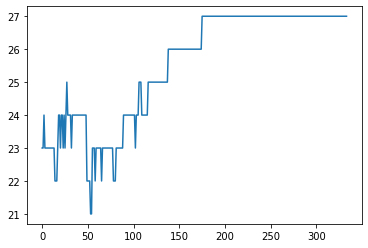

In [45]:
plt.plot(df_run_curves[df_run_curves.Temperature==df_run_curves.Temperature.iloc[0]].Fitness)

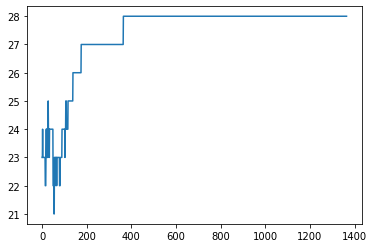

In [49]:
plt.plot(df_run_curves[df_run_curves.Temperature==df_run_curves.Temperature.iloc[0]].Fitness)

In [48]:
max(df_run_curves[df_run_curves.Temperature==df_run_curves.Temperature.iloc[0]].Fitness)

28.0

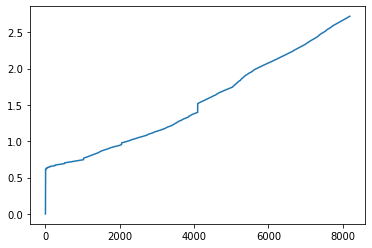

In [42]:
plt.plot(df_run_curves[df_run_curves.Temperature==df_run_curves.Temperature.iloc[0]].Time)

In [35]:
df_run_curves.Temperature.iloc[0]

GeomDecay(init_temp=1, decay=0.99, min_temp=0.001)

In [39]:
df_run_curves.head(10)

,Iteration,Time,Fitness,Temperature,max_iters
0,0,0.000168,23.0,1,8192
1,1,0.000995,23.0,1,8192
2,2,0.595410,24.0,1,8192
3,3,0.602652,23.0,1,8192
4,4,0.602797,23.0,1,8192
5,5,0.609945,23.0,1,8192
6,6,0.610022,23.0,1,8192
7,7,0.610087,23.0,1,8192
8,8,0.610146,23.0,1,8192
9,9,0.616723,23.0,1,8192


### GA

In [60]:
from mlrose_hiive.runners import GARunner

experiment_name = 'example_experiment'
ga = GARunner(problem=problem_cust,
              experiment_name=experiment_name,
              output_directory=OUTPUT_DIRECTORY,
              seed=SEED,
              iteration_list=2 ** np.arange(12),
              max_attempts=1000,
              population_sizes=[150, 200, 300],
              mutation_rates=[0.4, 0.5, 0.6])

# the two data frames will contain the results
df_run_stats, df_run_curves = ga.run()   

Running ga
*****************
*** Run START ***
*****************
pop_size:[150], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.02], fitness:[23.0000]
	[5 3 4 0 7 1 3 5]...

pop_size:[150], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[1], iteration:[1], done:[False], time:[0.06], fitness:[26.0000]
	[3 6 0 7 2 7 5 1]...

pop_size:[150], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[2], iteration:[2], done:[False], time:[0.12], fitness:[26.0000]
	[3 6 0 7 2 7 5 1]...

pop_size:[150], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[4], iteration:[4], done:[False], time:[0.20], fitness:[26.0000]
	[3 6 0 7 2 7 5 1]...

pop_size:[150], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], a

pop_size:[200], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[4], iteration:[4], done:[False], time:[0.14], fitness:[26.0000]
	[0 4 5 1 6 3 7 2]...

pop_size:[200], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[1], iteration:[8], done:[False], time:[0.28], fitness:[28.0000]
	[4 0 7 5 2 6 1 3]...

pop_size:[200], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[9], iteration:[16], done:[False], time:[0.49], fitness:[28.0000]
	[4 0 7 5 2 6 1 3]...

pop_size:[200], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[25], iteration:[32], done:[False], time:[0.86], fitness:[28.0000]
	[4 0 7 5 2 6 1 3]...

pop_size:[200], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[57], iteration:[64], done:[False], time:[1.58], fitnes

pop_size:[300], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[4], iteration:[4], done:[False], time:[0.57], fitness:[26.0000]
	[5 7 4 0 3 6 2 7]...

pop_size:[300], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[8], iteration:[8], done:[False], time:[0.96], fitness:[26.0000]
	[5 7 4 0 3 6 2 7]...

pop_size:[300], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[6], iteration:[16], done:[False], time:[1.57], fitness:[27.0000]
	[1 4 4 7 0 3 6 2]...

pop_size:[300], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[5], iteration:[32], done:[False], time:[2.59], fitness:[28.0000]
	[1 6 4 7 0 3 5 2]...

pop_size:[300], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[37], iteration:[64], done:[False], time:[4.47], fitness

In [392]:
from mlrose_hiive.runners import GARunner

experiment_name = 'example_experiment'
ga = GARunner(problem=problem_cust,
              experiment_name=experiment_name,
              output_directory=OUTPUT_DIRECTORY,
              seed=SEED,
              iteration_list=2 ** np.arange(12),
              max_attempts=1000,
              population_sizes=[150],
              mutation_rates=[0.4])

# the two data frames will contain the results
df_run_stats, df_run_curves = ga.run()   

Running ga
*****************
*** Run START ***
*****************
pop_size:[150], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.02], fitness:[23.0000]
	[5 3 4 0 7 1 3 5]...

pop_size:[150], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[1], iteration:[1], done:[False], time:[0.05], fitness:[26.0000]
	[3 6 0 7 2 7 5 1]...

pop_size:[150], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[2], iteration:[2], done:[False], time:[0.13], fitness:[26.0000]
	[3 6 0 7 2 7 5 1]...

pop_size:[150], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], attempt:[4], iteration:[4], done:[False], time:[0.22], fitness:[26.0000]
	[3 6 0 7 2 7 5 1]...

pop_size:[150], mutation_prob:[0.4], max_iters:[2048]
runner_name:[ga], experiment_name:[example_experiment], a

In [62]:
df_run_curves.head()

,Iteration,Time,Fitness,Population Size,Mutation Rate,max_iters
0,0,0.016922,26.0,150,0.4,2048
1,1,0.058788,26.0,150,0.4,2048
2,2,0.117194,26.0,150,0.4,2048
3,3,0.144888,26.0,150,0.4,2048
4,4,0.196347,26.0,150,0.4,2048


In [66]:
df_run_curves['Mutation Rate'].iloc[0]

0.4

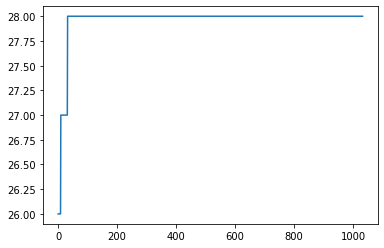

In [77]:
plt.plot(df_run_curves[(df_run_curves['Population Size']==150) & (df_run_curves['Mutation Rate']==0.4)].Fitness)

In [78]:
df_run_curves[(df_run_curves['Population Size']==150) & (df_run_curves['Mutation Rate']==0.4)].iloc[-1]

Iteration          1032.000000
Time                 17.015993
Fitness              28.000000
Population Size     150.000000
Mutation Rate         0.400000
max_iters          2048.000000
Name: 1032, dtype: float64

In [92]:
df_run_stats.groupby(['Population Size','Mutation Rate'])['Time','Fitness'].sum()

Time  Fitness
Population Size Mutation Rate                     
150             0.4             52.361090    349.0
                0.5             50.628644    350.0
                0.6             50.008105    351.0
200             0.4             68.766307    353.0
                0.5             83.283506    351.0
                0.6             98.020604    350.0
300             0.4            188.548670    350.0
                0.5            152.740487    352.0
                0.6            148.184451    355.0

In [93]:
df_run_stats.groupby(['Population Size','Mutation Rate'])['Time','Fitness'].max()

Time  Fitness
Population Size Mutation Rate                    
150             0.4            17.031234     28.0
                0.5            16.149241     28.0
                0.6            16.293670     28.0
200             0.4            22.258415     28.0
                0.5            26.736798     28.0
                0.6            30.870644     28.0
300             0.4            60.001268     28.0
                0.5            48.221579     28.0
                0.6            44.995372     28.0

In [94]:
df_run_curves.head()

,Iteration,Time,Fitness,Population Size,Mutation Rate,max_iters
0,0,0.016922,26.0,150,0.4,2048
1,1,0.058788,26.0,150,0.4,2048
2,2,0.117194,26.0,150,0.4,2048
3,3,0.144888,26.0,150,0.4,2048
4,4,0.196347,26.0,150,0.4,2048


In [401]:
from mlrose_hiive.runners import MIMICRunner

experiment_name = 'example_experiment'
#problem = TSPGenerator.generate(seed=SEED, number_of_cities=22)

mmc = MIMICRunner(problem=problem_cust,
                  experiment_name=experiment_name,
                  output_directory=OUTPUT_DIRECTORY,
                  seed=SEED,
                  iteration_list=2 ** np.arange(10),
                  max_attempts=100,
                  population_sizes=[100,200],
                  keep_percent_list=[0.25, 0.5, 0.75])


In [402]:
df_run_stats, df_run_curves = mmc.run()   

Running mimic
*****************
*** Run START ***
*****************
use_fast_mimic:[False], pop_size:[100], keep_pct:[0.25], max_iters:[512]
runner_name:[mimic], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.02], fitness:[23.0000]
	[5 3 4 0 7 1 3 5]...

use_fast_mimic:[False], pop_size:[100], keep_pct:[0.25], max_iters:[512]
runner_name:[mimic], experiment_name:[example_experiment], attempt:[1], iteration:[1], done:[False], time:[0.14], fitness:[25.0000]
	[2. 7. 3. 0. 2. 4. 6. 7.]...

use_fast_mimic:[False], pop_size:[100], keep_pct:[0.25], max_iters:[512]
runner_name:[mimic], experiment_name:[example_experiment], attempt:[2], iteration:[2], done:[False], time:[0.33], fitness:[25.0000]
	[2. 7. 3. 0. 2. 4. 6. 7.]...

use_fast_mimic:[False], pop_size:[100], keep_pct:[0.25], max_iters:[512]
runner_name:[mimic], experiment_name:[example_experiment], attempt:[4], iteration:[4], done:[False], time:[0.64], fitness:[25.0000]
	[2. 7. 3. 0. 2. 4. 6. 7.].

use_fast_mimic:[False], pop_size:[200], keep_pct:[0.25], max_iters:[512]
runner_name:[mimic], experiment_name:[example_experiment], attempt:[62], iteration:[64], done:[False], time:[8.58], fitness:[27.0000]
	[4. 6. 0. 2. 5. 1. 3. 7.]...

use_fast_mimic:[False], pop_size:[200], keep_pct:[0.25], max_iters:[512]
runner_name:[mimic], experiment_name:[example_experiment], attempt:[101], iteration:[103], done:[True], time:[15.94], fitness:[27.0000]
	[4. 6. 0. 2. 5. 1. 3. 7.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[False], pop_size:[200], keep_pct:[0.5], max_iters:[512]
runner_name:[mimic], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.05], fitness:[23.0000]
	[5 3 4 0 7 1 3 5]...

use_fast_mimic:[False], pop_size:[200], keep_pct:[0.5], max_iters:[512]
runner_name:[mimic], experiment_name:[example_experiment], attempt:[1], iteration:[1], done:[False], time:[0.30], fitness

In [414]:
best_state, best_fitness, fitness_curve_bag_queen_mmc = mlrose_hiive.mimic(problem_cust,  
                                                                                                max_attempts = 200, 
                                                                 max_iters=10000,
                                              random_state = 2,curve=True,keep_pct=0.75,pop_size=200)

In [415]:
best_fitness

27.0

In [294]:
len(evaluations)

451664

In [295]:
len(fitness_curve_bag)

1001

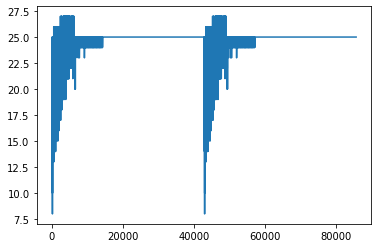

In [416]:
plt.plot(evaluations)

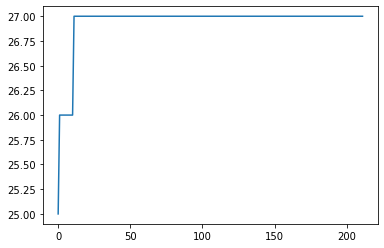

In [417]:
plt.plot(fitness_curve_bag_queen_mmc)

In [418]:
best_state

array([4, 2, 7, 5, 7, 0, 6, 3])

## KnapSack

In [120]:
sum(weights)*0.6

24.0

In [207]:
# Initialize fitness function object using pre-defined class
weights = [10, 5, 2, 8, 15]
values = [1, 2, 3, 4, 5]
max_weight_pct = 0.6
fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct)

In [241]:
import random
random.seed(0) 

wei = [random.randint(1,50) for _ in range(140)]
val = [random.randint(1,50) for _ in range(140)]
max_weight_pct = 0.6
fitness = mlrose_hiive.Knapsack(wei, val, max_weight_pct,max_item_count=10,multiply_by_max_item_count=True)

In [242]:
# Define alternative N-Queens fitness function for maximization problem
evaluations = []
def knapsack_max(state):
    
    currentfit = fitness.evaluate(state)
    evaluations.append(currentfit)
    return currentfit

In [248]:
state=np.array([1]*130+[1]*10)

In [249]:
fitness.evaluate(state)

3426

In [164]:
# Check function is working correctly
state = np.array([0]*140)

# The fitness of this state should be 22
knapsack_max(state)

0

In [250]:
# Initialize custom fitness function object
fitness_cust = mlrose_hiive.CustomFitness(knapsack_max)

In [251]:
state

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [252]:
# Define optimization problem object
problem_cust = mlrose_hiive.DiscreteOpt(length = 140, fitness_fn = fitness_cust, maximize = True,max_val=10)

### SA for sacks

In [253]:
# Solve using simulated annealing - attempt 1
init_state = np.array([0]*140)
schedule = mlrose_hiive.ExpDecay()
best_state, best_fitness, fitness_curve_bag,time_curve_bag = mlrose_hiive.simulated_annealing(problem_cust, schedule = schedule, 
                                                      max_attempts = 100, max_iters = 1000, 
                                                      init_state = init_state, random_state = 1,curve= True)

In [254]:
best_fitness

19560.0

In [255]:
best_state

array([7, 9, 6, 0, 1, 8, 5, 9, 9, 1, 8, 6, 4, 5, 6, 1, 8, 9, 5, 7, 7, 9,
       6, 7, 3, 6, 0, 6, 9, 8, 9, 9, 9, 3, 5, 0, 6, 9, 7, 7, 9, 5, 6, 6,
       7, 8, 4, 8, 6, 4, 3, 8, 7, 6, 9, 9, 9, 9, 9, 9, 0, 9, 7, 7, 0, 2,
       4, 3, 8, 7, 0, 9, 9, 5, 8, 5, 9, 8, 8, 6, 6, 3, 7, 1, 3, 0, 0, 8,
       7, 9, 0, 0, 1, 5, 9, 7, 8, 3, 5, 0, 0, 9, 7, 3, 0, 3, 6, 5, 6, 8,
       4, 9, 8, 3, 6, 9, 7, 3, 8, 8, 0, 7, 6, 3, 4, 8, 8, 4, 9, 8, 1, 7,
       6, 2, 5, 9, 9, 9, 9, 9])

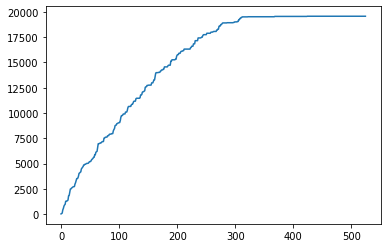

In [256]:
plt.plot(fitness_curve_bag)

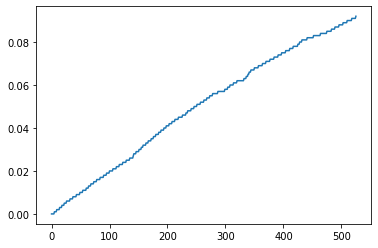

In [257]:
plt.plot(time_curve_bag)

### GA for sacks

In [258]:
# Solve using genetic algorithm
best_state, best_fitness, fitness_curve_bag = mlrose_hiive.genetic_alg(problem_cust, mutation_prob = 0.2, max_attempts = 100, 
                                              random_state = 2,curve=True)

In [259]:
best_fitness

27818.0

In [245]:
np.array([1]*4+[0])

array([1, 1, 1, 1, 0])

In [246]:
state = np.array([1, 1, 1, 1, 1])

In [218]:
fitness.evaluate(state)

0

In [260]:
best_state

array([9, 2, 4, 9, 0, 9, 9, 2, 9, 3, 9, 2, 9, 9, 4, 3, 9, 9, 9, 0, 9, 9,
       9, 9, 9, 0, 3, 0, 9, 0, 9, 9, 0, 8, 3, 9, 3, 0, 9, 3, 1, 0, 9, 1,
       9, 9, 9, 9, 9, 2, 9, 9, 9, 0, 9, 0, 4, 0, 9, 5, 9, 9, 9, 0, 8, 9,
       4, 9, 0, 9, 9, 9, 8, 9, 9, 9, 9, 6, 9, 9, 9, 9, 2, 9, 7, 2, 7, 9,
       9, 0, 9, 8, 9, 6, 0, 9, 9, 9, 9, 9, 8, 9, 7, 9, 9, 9, 4, 8, 9, 0,
       9, 9, 9, 5, 9, 1, 9, 0, 2, 9, 9, 9, 8, 9, 5, 9, 9, 9, 9, 9, 1, 9,
       0, 9, 9, 9, 9, 4, 0, 9])

In [209]:
weights

[10, 5, 2, 8, 15]

In [229]:
sum(best_state)

634

In [178]:
sum(wei)

3623

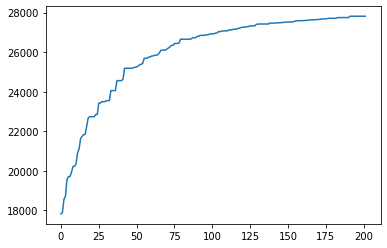

In [261]:
plt.plot(fitness_curve_bag)

## mimic for sacks

In [183]:
state

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [263]:
best_state, best_fitness, fitness_curve_bag = mlrose_hiive.mimic(problem_cust,  max_attempts = 10, 
                                                                 max_iters=100,
                                              random_state = 2,curve=True)

In [348]:
best_state, best_fitness, fitness_curve_bag = mlrose_hiive.mimic(problem_cust,  max_attempts = 1000, 
                                                                 max_iters=10000,
                                              random_state = 2,curve=True)

In [264]:
best_fitness

24614.0

In [165]:
len(wei)

140

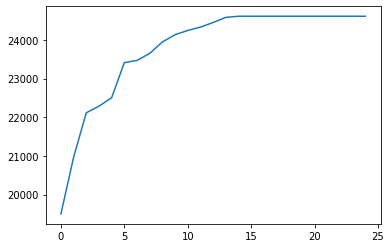

In [265]:
plt.plot(fitness_curve_bag)

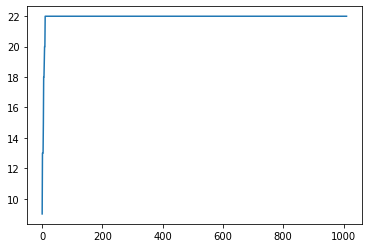

In [350]:
plt.plot(fitness_curve_bag)

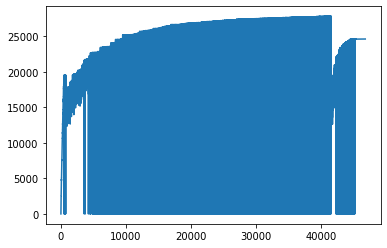

In [267]:
plt.plot(np.array(evaluations))

In [349]:
with open('mimic_sack_eval.npy', 'wb') as f:
    np.save(f, np.array(evaluations))
with open('mimic_sack_fit_curve.npy', 'wb') as f:
    np.save(f, np.array(best_state))
with open('mimic_sack_best_fitness.npy', 'wb') as f:
    np.save(f, np.array(fitness_curve_bag))

In [300]:
    
with open('output/mimic_sack_eval.npy', 'rb') as f:
    a = np.load(f)


In [299]:
import os
os.getcwd()

'C:\\Users\\xiaoyal\\github\\ml_7641\\homework2\\mlrose-master'

# four peaks


In [ ]:
fitness = mlrose_hiive.FourPeaks(t_pct=0.15)


In [352]:
# Initialize fitness function object using pre-defined class
fitness = mlrose_hiive.FourPeaks(t_pct=0.2)


### customized fitness function to keep track of evaluations

In [354]:
# Define alternative N-Queens fitness function for maximization problem
evaluations = []
def fourpeak_max(state):
    
    # Initialize counter
    currentfit = fitness.evaluate(state)
    evaluations.append(currentfit)
    return currentfit

In [355]:
# Initialize custom fitness function object
fitness_cust = mlrose_hiive.CustomFitness(fourpeak_max)

In [356]:
# Check function is working correctly
state = np.array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])
# The fitness of this state should be 22
fitness_cust.evaluate(state)

4

In [357]:
# Define optimization problem object
problem_cust = mlrose_hiive.DiscreteOpt(length = 60, fitness_fn = fitness_cust, maximize = True, max_val = 2)

In [326]:
random.randint(0,1)

1

In [330]:
init_state[:10]

[1, 1, 0, 1, 1, 1, 1, 1, 1, 0]

### SA for 4 peak

In [353]:
# Define decay schedule
schedule = mlrose_hiive.ExpDecay()

In [362]:
# Solve using simulated annealing - attempt 1
random.seed(0)
init_state = [random.randint(0,1) for _ in range(60)]

best_state, best_fitness, fit_curve,fit_time = mlrose_hiive.simulated_annealing(problem_cust, schedule = schedule, 
                                                      max_attempts = 1000, max_iters = 10000, 
                                                      init_state = init_state, random_state = 1,curve= True)

In [363]:
best_fitness

60.0

In [360]:
best_state

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

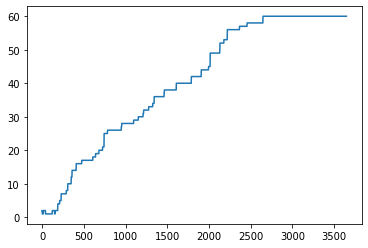

In [364]:
plt.plot(fit_curve)

## mimic for 4 peaks

In [365]:
from mlrose_hiive import mimic

In [368]:
best_state, best_fitness, fitness_curve_mimic = mlrose_hiive.mimic(problem_cust,  max_attempts = 10, 
                                                                 max_iters=100,
                                              random_state = 2,curve=True)

In [369]:
best_fitness

22.0

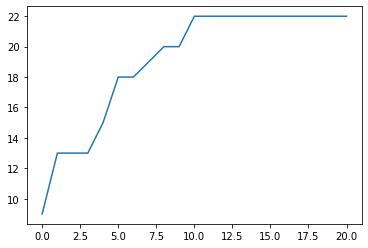

In [371]:
plt.plot(fitness_curve_mimic)

### GA for 4 peaks

In [379]:
best_state, best_fitness, fit_curve = mlrose_hiive.genetic_alg(problem_cust, max_attempts=1000,max_iters=10000, 
                                                               random_state = 2,curve= True)

In [380]:
best_fitness

107.0

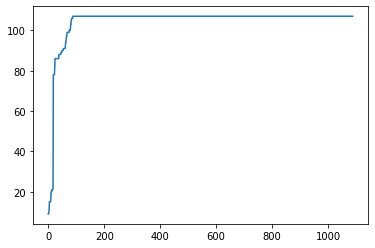

In [381]:
plt.plot(fit_curve)

### rhc for 4 peaks

In [384]:
best_state, best_fitness, fit_curve = mlrose_hiive.random_hill_climb(problem_cust, max_attempts=1000,max_iters=10000, 
                                                               random_state = 2,curve= True,restarts = 5)

In [386]:
best_fitness

60.0

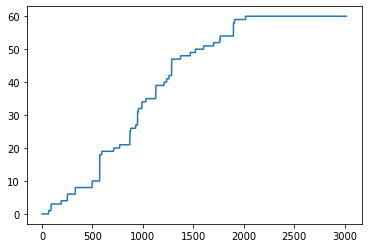

In [385]:
plt.plot(fit_curve)

In [427]:
random.seed(0) 

wei = [random.randint(1,50) for _ in range(140)]

In [428]:
wei[:10]

[25, 49, 27, 3, 17, 33, 32, 26, 20, 31]